In [1]:
# Standard libraries
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "neuronal-sequence-test"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

# User libraries
from src.lib.qt_wrapper import gui_fnames, gui_fpath
from src.lib.data_db import BehaviouralNeuronalDatabase
import src.lib.plots_lib as plots_lib

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/neuronal-sequence-test


# TODO

1. Preprocessing : Apply background subtraction
2. Alignment : Ensure intervals actually match. Ask Maria for visual test of alignment
3. Apply metrics - 1 data point per trial - pool trials - maintenance vs all
    * 1D semistatic: Mean, Variance, 1D Entropy
    * ND semistatic: Avg Correlation, ND Entropy
    * Dynamic-Extended: Predictive Info, AR(1) efficiency
    * Dynamic-Invariant: Orderability, Trunc PSD, PhaseSpace Clustering Distance
    * Dynamic-Translated:
        * Plot neuron-average activity over trials, see if alignment makes any sence
    * Dynamic-Scaled:
        * Plot avg scaled activity L vs R, Corr vs Miss, see if looks different
        * DimRed neurons, project time onto first few Legendre poly, do classification
   
4. Test Hypotheses:
    1. Maintenance vs other discriminates (Hit/Miss) $\otimes$ (L/R)
    2. Validation: Prev trial C/I or L/R predicts that of next trial
    3. Predictive aspect:
        * Semi-static maintenance activity is good predictor, fine temporal details irrelevant
        * Semi-static maintenance activity is not good, fine temporal details improve prediction

5. Visualize each metric:
    * For single trial, to check that it makes sense
    * By intervals and phases

In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
#params['root_path_data']  = gui_fpath("Path to data files", "./")
#params['root_path_data'] = '/media/aleksejs/DataHDD/work/data/maria'
params['root_path_data'] = '/media/alyosha/Data/TE_data/mariadata'

In [3]:
dataDB = BehaviouralNeuronalDatabase(params)

In [4]:
dataDB.read_neuro_files()

IntProgress(value=0, description='Read Neuro Data:', max=27)

In [5]:
dataDB.read_behavior_files()

IntProgress(value=0, description='Read Neuro Data:', max=27)

Reading /media/alyosha/Data/TE_data/mariadata/m060/Behavior_m060_20190522.mat
Reading /media/alyosha/Data/TE_data/mariadata/m060/Behavior_m060_20190524.mat
Reading /media/alyosha/Data/TE_data/mariadata/m060/Behavior_m060_20190527.mat
Reading /media/alyosha/Data/TE_data/mariadata/m060/Behavior_m060_20190606.mat
No trials found for Trial_LWhole_Mistake skipping
Reading /media/alyosha/Data/TE_data/mariadata/m061/Behavior_m061_20190517.mat
No trials found for Trial_RWhole_Mistake skipping
Reading /media/alyosha/Data/TE_data/mariadata/m061/Behavior_m061_20190524.mat
Reading /media/alyosha/Data/TE_data/mariadata/m061/Behavior_m061_20190527.mat
Reading /media/alyosha/Data/TE_data/mariadata/m065/Behavior_m065_20191128.mat
Reading /media/alyosha/Data/TE_data/mariadata/m065/Behavior_m065_20191204.mat
Reading /media/alyosha/Data/TE_data/mariadata/m065/Behavior_m065_20191205.mat
Reading /media/alyosha/Data/TE_data/mariadata/m065/Behavior_m065_20191206.mat
Reading /media/alyosha/Data/TE_data/mariad

In [6]:
plots_lib.table_test_metric_phase_vs_all(dataDB, "Maintenance", "mean", np.mean)

No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'mousekey': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'mousekey': 'm067_20200203'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'mousekey': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'mousekey': 'm067_20200203'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'R', 'mousekey': 'm061_20190517'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'R', 'mousekey': 'm061_20190517'} ; skipping
No behaviour found for {'direction': 'L', 'performance': 'Mistake', 'mousekey': 'm060_20190606'} ; skipping
No behaviour found for {'direction': 'L', 'performance': 'Mistake', 'mousekey': 'm067_20200203'} ; skipping
No behaviour found for {'direction': 'L', 'performance': 'Mistake', 'mousekey': 'm060_20190606'} ; skipping
No behaviour found for {'dir

,datatype,performance,direction,mean(Maintenance),mean(WholeTrial),pVal_log10,nTrial
0,raw,Correct,L,0.019289,-0.206037,-0.803902,434
1,raw,Correct,R,0.950768,0.282002,-1.178741,434
2,raw,Correct,All,0.485028,0.037982,-1.399905,868
3,raw,Mistake,L,-1.430908,-0.531368,-0.871310,114
4,raw,Mistake,R,0.520415,0.384788,-0.314756,122
5,raw,Mistake,All,-0.422174,-0.057762,-0.647905,236
6,raw,All,L,-0.282395,-0.273716,-0.429918,548
7,raw,All,R,0.856338,0.304555,-1.018356,556
8,raw,All,All,0.291097,0.017515,-0.901452,1104
9,high,Correct,L,-0.017412,-0.011339,-3.219169,434


In [7]:
queryThis = {"mousename" : "m060", "performance" : "Correct", "datatype" : "high"}

plots_lib.table_binary_classification(dataDB, "Maintenance", queryThis, "direction")

{'mousename': 'm060', 'performance': 'Correct', 'datatype': 'high', 'direction': 'R'} (59, 88)
{'mousename': 'm060', 'performance': 'Correct', 'datatype': 'high', 'direction': 'L'} (74, 88)


{'Accuracy_Train': 0.8663025210084033,
 'Accuracy_Test : ': 0.5421428571428571,
 'p-value': 0.568380020120288}

(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(74, 88)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(36, 46)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(89, 83)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(64, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(65, 47)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(77, 49)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)
(93, 28)


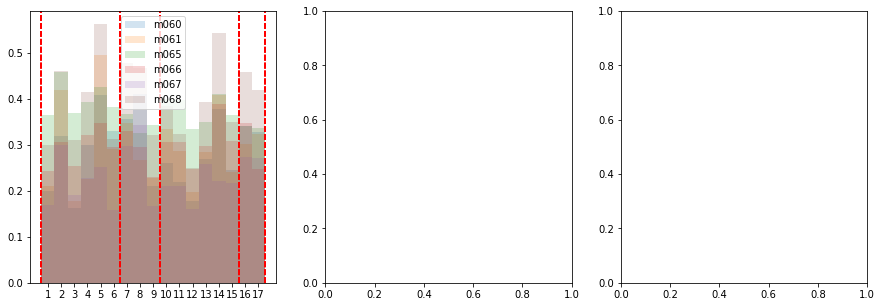

In [23]:
'''
TODO:
    * [+] Rewrite to use AX as param
    * [+] Plot all mice overlay
    * [ ] enable other metrics
'''

metric = "avgOrd"
queryThis = {"direction" : "L", "performance" : "Correct", "datatype" : "raw"}

fig, ax = plt.subplots(ncols=3, figsize=(15,5))
for mousename in sorted(list(dataDB.mice)):
    queryMouse = deepcopy(queryThis)
    queryMouse["mousename"] = mousename
    plots_lib.plot_metric_by_interval(ax[0], dataDB, queryMouse, metric, mousename)
    
# plots_lib.plot_metric_by_interval(ax[1], dataDB, queryThis, metric, "all")
# plots_lib.plot_metric_by_phase(ax[2], dataDB, queryThis, metric, "all")
ax[0].legend()
plt.show()


In [ ]:
fig, ax = plt.subplots()
queryThis = {"mousename" : "m060", "direction" : "L", "performance" : "Correct", "datatype" : "raw"}
plots_lib.plot_stretched_intervals(ax, dataDB, queryThis, 6, 8, nInterp=200)
plt.show()